# OpenCV FreeCodeCamp training Implementation

In this Tutorial of OpenCv we included code on how to

Detect Faces using Haarcascades

Face Recongnition


In [2]:
import cv2 as cv
import numpy as np
import os
#import caer
import matplotlib.pyplot as plt
import sys

In [2]:
!python --version

Python 3.8.8


In [4]:
#function to display multiple images in notebook
def show(img1, img2):
    a=2
    fig = plt.figure(figsize=(20, 20))
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, a, 1)
    plt.imshow(img1)
    plt.title('Image')
    plt.xticks([])
    plt.yticks([])
        
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, a, 2)
    plt.imshow(img2)
    plt.title('Resulting Image')
    plt.xticks([])
    plt.yticks([])

No of faces found = 1


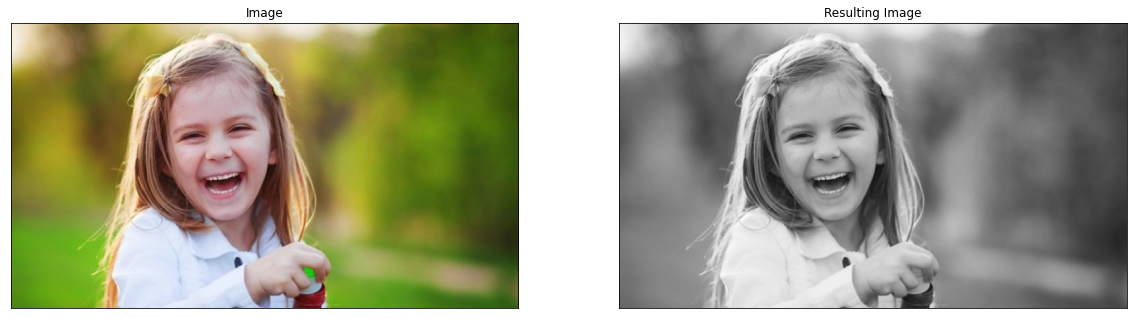

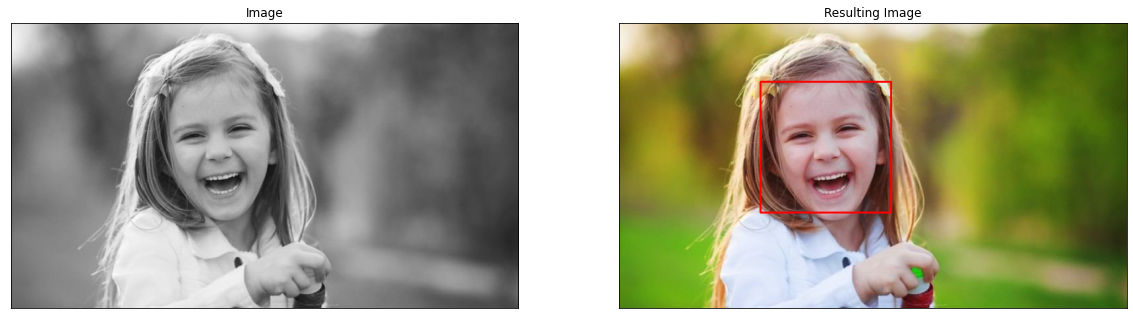

In [5]:
img = cv.imread('face6.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(img, gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 3)

print(f'No of faces found = {len(faces_rect)}')

for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), thickness = 2)
    
show(gray, img)

No of faces found = 3


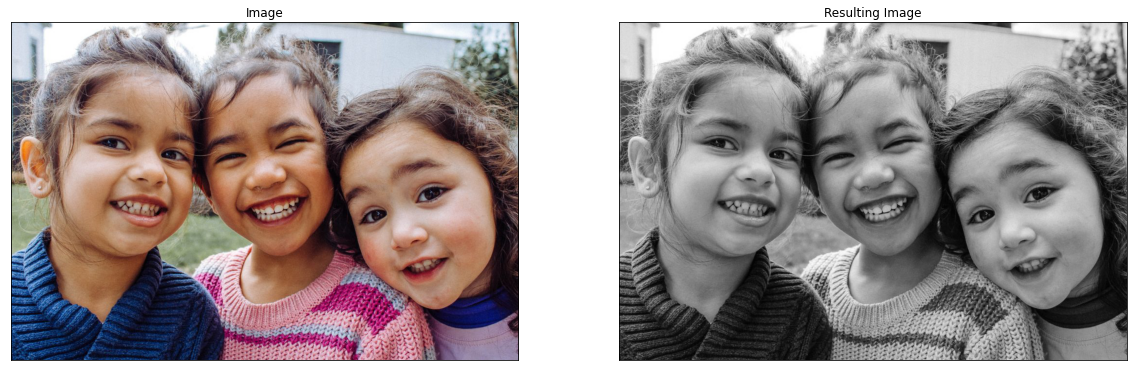

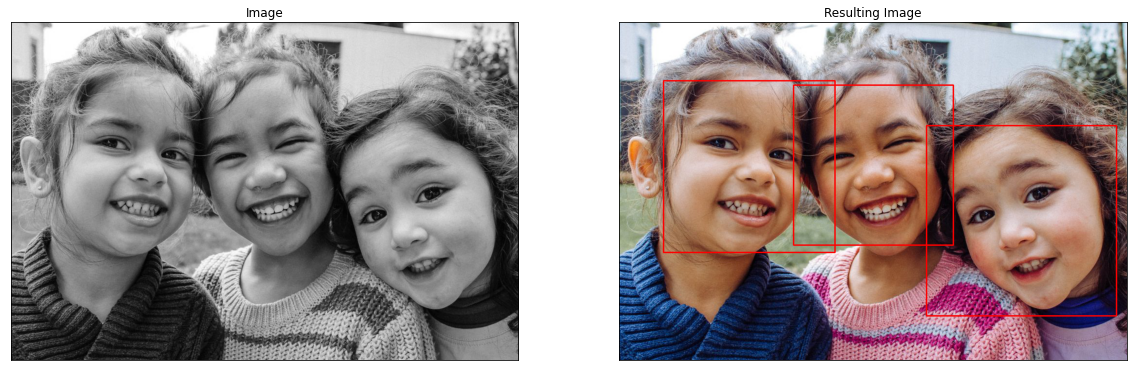

In [6]:
img = cv.imread('face7.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(img, gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 3)

print(f'No of faces found = {len(faces_rect)}')

for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), thickness = 2)
    
show(gray, img)

# Face Recongnition

In [11]:
people = ['Anne', 'catherine', 'Charlize', 'Jessica', 'Sophie']

DIR = r'/home/basit/Desktop/OpenCV/Faces/train/'

haar_cascade = cv.CascadeClassifier('haar_face.xml')

features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)
        
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            
            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 4)
            
            for (x, y, w, h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)
                
create_train()
print(f'Length of the features list = {len(features)}')
print(f'Length of the labels list = {len(labels)}')


#training face recongnizer
features = np.array(features, dtype = 'object')
labels = np.array(labels)
face_recongnizer = cv.face.LBPHFaceRecognizer_create()


print('-----------------Starting Training ---------------')
face_recongnizer.train(features, labels)
print('-----------------Training comlete---------------')


#saving
face_recongnizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

Length of the features list = 110
Length of the labels list = 110
-----------------Starting Training ---------------
-----------------Training comlete---------------


Label = Sophie with a confidence of 34.35548713934076


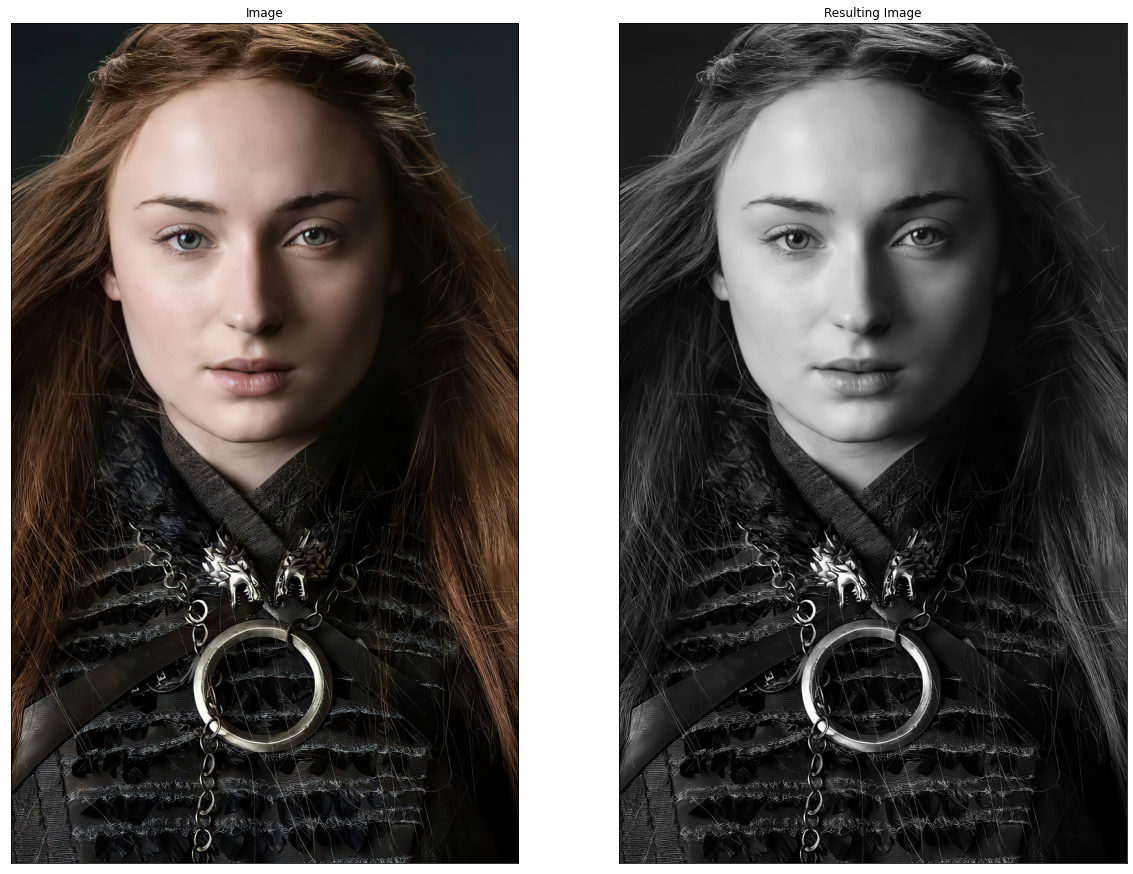

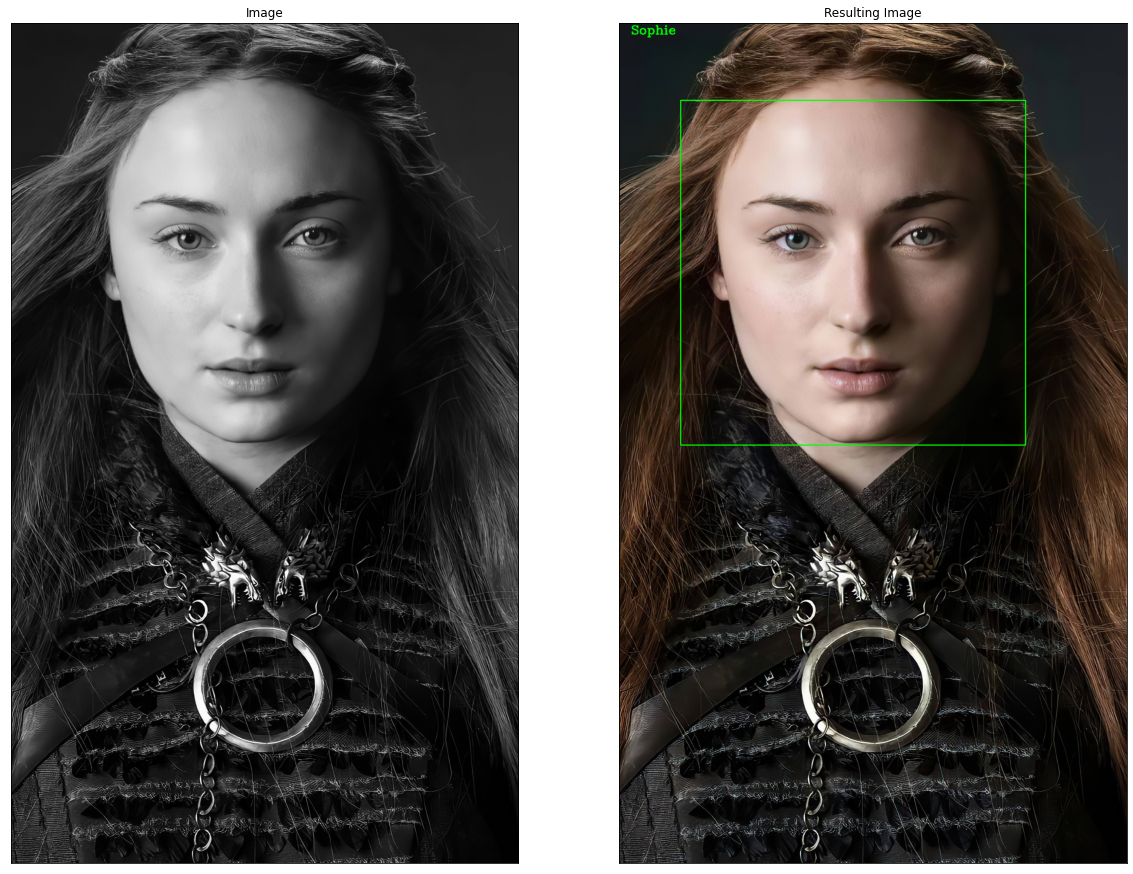

In [31]:
#prediction using saved model
features = np.load('features.npy', allow_pickle=True)
labels = np.load('labels.npy')

face_recongnizer1 = cv.face.LBPHFaceRecognizer_create()
face_recongnizer1.read('face_trained.yml')

img = cv.imread(r'/home/basit/Desktop/OpenCV/Faces/train/Sophie/16.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

show(img, gray)

#detect the face in image
faces_rect1 = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 4)

for (x, y, w, h) in faces_rect1:
    faces_roi1 = gray[y:y+h, x:x+w]
    
    label, confidence = face_recongnizer1.predict(faces_roi1)
    print(f'Label = {people[label]} with a confidence of {confidence}')
    cv.putText(img, str(people[label]), (30, 30), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), thickness = 2)
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness = 2)
    
show(gray, img)